/var/folders/yv/kbb9q2f16z755yyqqbfpb7b00000gn/T/ipykernel_68347/4254903476.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())
/Users/huzaifashafiq/miniforge3/envs/BMEN/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Cross-Validation Scores: [0.92982456 0.98245614 0.98245614 0.94736842 0.96491228 0.98245614
 0.96491228 0.98245614 1.         0.98214286]

Average Cross-Validation Score: 0.9718984962406015

Accuracy: 0.9766081871345029

Confusion Matrix:
 [[105   3]
 [  1  62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       108
           1       0.95      0.98      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


AUC-ROC: 0.9954438565549677

F1 Score: 0.9766816281357601

Recall: 0.9766081871345029

Precision: 0.9770376594606983

Balanced Accuracy: 0.9781746031746031

Matthews Correlation Coefficient: 0.9503619573015132
Confusion matrix:


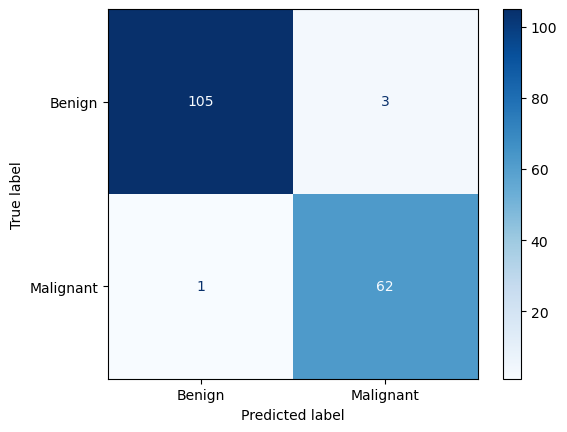

/Users/huzaifashafiq/miniforge3/envs/BMEN/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


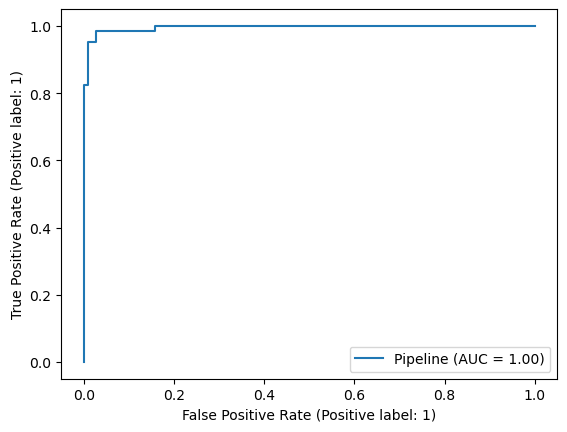

In [4]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, recall_score, precision_score, balanced_accuracy_score, roc_auc_score

import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv("breast-cancer.csv")

# Fill missing values with the mean of the respective column
data = data.fillna(data.mean())

# Define the features and target variables
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Encoding the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the penalized SVM classifier with L2 penalty
classifier = make_pipeline(StandardScaler(), LinearSVC(penalty='l2', dual=False, random_state=42))

# Add k-fold cross-validation
k = 10
cv_scores = cross_val_score(classifier, X, y, cv=k)

# Train the classifier using the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Since LinearSVC does not have the 'predict_proba' method, we cannot calculate AUC-ROC directly
# We can use the decision function to get the distance from the decision boundary
y_decision_function = classifier.decision_function(X_test)
auc_roc = roc_auc_score(y_test, y_decision_function)

f1 = f1_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
matthews_corr = matthews_corrcoef(y_test, y_pred)

# Print the results
print("\nCross-Validation Scores:", cv_scores)
print("\nAverage Cross-Validation Score:", cv_scores.mean())
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAUC-ROC:", auc_roc)
print("\nF1 Score:", f1)
print("\nRecall:", recall)
print("\nPrecision:", precision)
print("\nBalanced Accuracy:", balanced_accuracy)
print("\nMatthews Correlation Coefficient:", matthews_corr)

print("Confusion matrix:")
plot_confusion_matrix(classifier, X_test, y_test, display_labels=['Benign', 'Malignant'], cmap=plt.cm.Blues)
plt.show()

# Plot ROC curve
plot_roc_curve(classifier, X_test, y_test)
plt.show()